# Финальный проект "Игры — Анализ рекламных источников"

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:
* Победа над первым врагом
* Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет **`game_actions.csv`**:
* `event_datetime` — время события;
* `event` — одно из трёх событий:
1. `building` — объект построен,
2. `finished_stage_1` — первый уровень завершён,
3. `project` — проект завершён;
* `building_type` — один из трёх типов здания:
1. `assembly_shop` — сборочный цех,
2. `spaceport` — космопорт,
3. `research_center` — исследовательский центр;
* `user_id` — идентификатор пользователя;
* `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет **`ad_cost.csv`**:
* `day` - день, в который был совершен клик по объявлению
* `source` - источник трафика
* `cost` - стоимость кликов

Датасет **`user_source.csv`** содержит колонки:
* `user_id` - идентификатор пользователя
* `source` - источников, с которого пришёл пользователь, установивший приложение.

# Ссылка на презентацию

https://disk.yandex.ru/i/gCxqDZzbmRl_VA

**Чек-лист проекта**

- [x] **Загрузка данных и библиотек**
- [x] **Предобработка данных**
- [x] Проверить пропущенные значения и при необходимости обработать их их
- [x] Проверить соответствие типов данных и при необходимости привести к нужным
- [x] Проверить дубликаты и при необходимости удалить их
- [x] Проверить корректность названий столбцов и при необходимости переименовать
- [x] **Исследовательский анализ данных**
- [x] Среднее количество событий
- [x] Среднее время окончания 1го уровня
- [X] Количество пользователей завершивших 1ый уровень через реализацию проекта и победу над другим игроком
- [X] Количество посещений приложения в день
- [X] Расчет стоимости привлечения новых клиентов CAC
- [X] Вывод о возможных способах монетизации
- [X] **Статистический анализ**
- [X] Время завершения уровня различается в зависимости способа прохождения
- [X] Количество построек различается в зависимости способа прохождения
- [X] Общий вывод
- [x] **Презентация**

## Загрузка данных и библиотек

Перед началом работы сданными загрузим необходимые библиотеки:

In [1]:
# импортируем библиотеки для работы с данными, графиками и математическими операторами
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import scipy.stats as stats

Далее прочитаем заданный датафрейм:

In [2]:
# два варианта загрузки датафреймов через связку try-except, 
try:
  df_actions = pd.read_csv('/datasets/game_actions.csv')
  df_ad = pd.read_csv('/datasets/ad_costs.csv')
  df_users = pd.read_csv('/datasets/user_source.csv')
except:
  df_actions = pd.read_csv('C:/Users/podor/jupyter notes/final_project/game_actions.csv')
  df_ad = pd.read_csv('C:/Users/podor/jupyter notes/final_project/ad_costs.csv')
  df_users = pd.read_csv('C:/Users/podor/jupyter notes/final_project/user_source.csv')

## Предобработка данных

### Изучение данных

Для изучения данных воспользуемся функцией, которая выводит основную информацию по датафреймам:

In [3]:
# воспользуемся функцией автоматизиции вывода первичных данных по заданной таблице
def df_analysis(dataframe):
    """
    На вход функция принимает датафрейм.
    Выводит поэтапно на экран информацию по таблице методом info(),
    10 первых строчек методом head(), описание данных таблицы методом describe(), 
    а также выводит долю пропусков по столбцам с количеством дубликатов по всей таблице.
    """
    dataframe.info()
    print('*'*50)
    display(dataframe.head(10))
    print('*'*50)
    display(dataframe.describe())
    print('*'*50)
    print(f'Доля пропусков в таблице {dataframe.isna().mean().apply("{:.2%}".format)}, количество дубликатов {dataframe.duplicated().sum()}')
    print('*'*50)

Далее применим функцию для представленных датасетов:

In [4]:
# с помощью функции df_analysis выведем первичную информацию по заданной таблице
df_analysis(df_actions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
**************************************************


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


**************************************************


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-09 08:39:32,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127957,59325,22,1866


**************************************************
Доля пропусков в таблице event_datetime     0.00%
event              0.00%
building_type      5.66%
user_id            0.00%
project_type      98.62%
dtype: object, количество дубликатов 1
**************************************************


In [5]:
# с помощью функции df_analysis выведем первичную информацию по заданной таблице
df_analysis(df_ad)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
**************************************************


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


**************************************************


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


**************************************************
Доля пропусков в таблице source    0.00%
day       0.00%
cost      0.00%
dtype: object, количество дубликатов 0
**************************************************


In [6]:
# с помощью функции df_analysis выведем первичную информацию по заданной таблице
df_analysis(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
**************************************************


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


**************************************************


,user_id,source
count,13576,13576
unique,13576,4
top,8fbdf7af-d60a-4a3e-9b34-cfb4e28b2aa1,yandex_direct
freq,1,4817


**************************************************
Доля пропусков в таблице user_id    0.00%
source     0.00%
dtype: object, количество дубликатов 0
**************************************************


**Предварительный вывод**

Данные загружены и проверены. Найдены проблемы в данных.

Датафрейм **`df_actions`**:
* столбец `event_datetime` содержит данные типа *object*, необходимо изменить на *datetime*;
* имеются пропуски в столбцах `building_type` (5,66%) и `project_type` (98,62%). Данные пропуски возникли по причине того, что в первом случае игрок не построил ни одного здания и, скорее всего, ушел в отток. А во втором случае игрок или также ушел в отток или завершил уровень победой над другим игроком. Соответственно данные пропуски оставим без изменений.
* в датафрейме присутствует 1 дубликат, необходимо будет его удалить.

Датафрейм **`df_ad`**:
* столбец `day` содержаться данные типа *object*, необходимо изменить на *datetime*;
* пропусков и дубликатов нет.

Датафрейм **`df_users`**:
* типы данных соответствуют необходимым, пропусков и дубликатов нет.

### Обработка данных

Обработаем вышеупомянутые проблемы датафрейма `df_actions`:

In [7]:
# изменим тип данных столбца event_datetime
df_actions['event_datetime'] = pd.to_datetime(df_actions['event_datetime'], format='%Y-%m-%dT%H:%M:%S')

# удалим присутствующий дубликат и перезапишем датасет
df_actions = df_actions.drop_duplicates()

Так же обработаем датафрейм `df_ad`:

In [8]:
# изменим тип данных столбца day
df_ad['day'] = pd.to_datetime(df_ad['day'], format='%Y-%m-%d')

### Вывод

В ходе предобработки выявлены и устранены проблемы с данными (дубликаты, неверные форматы данных). 
Данные готовы к исследовательскому анализу.

## Исследовательский анализ данных

### Среднее количество событий

Перед тем, как анализировать данные, необходимо соединить таблицы `df_actions` и `df_users` в одну. Это нужно как раз для того, чтобы была возможность разделить пользователей по каналам привлечения.

In [9]:
# методом merge соберем две таблицы в одну по значениям столбца user_id
df = df_actions.merge(df_users, on='user_id')

Рассмотрим, по каким каналам привлекались пользователи в ходе рекламной компании:

In [10]:
df['source'].unique()

array(['youtube_channel_reklama', 'facebook_ads', 'instagram_new_adverts',
       'yandex_direct'], dtype=object)

Как видно из получившегося списка в данном кейсе отсутсвуют "органические" клиенты. Видимо это связано с тем, что игра совсем новая и пользователи привлекаются пока только благодаря рекламе.

Далее посмотрим, какую долю составляют пользователи из разных каналов:

In [11]:
# методом groupby соберем суммарные данные об уникальных пользователях для каждого канала привлечения
# рассчитаем долю кждого канала от общего количества и выведем на экран
event_user_id = df.groupby('source').agg({'user_id':'nunique'})
event_user_id['users_rate'] = (event_user_id['user_id'] / event_user_id['user_id'].sum()).apply("{:.2%}".format)
event_user_id = event_user_id.sort_values(by='users_rate', ascending = False).reset_index()
event_user_id.columns = event_user_id.columns.str.replace('user_id', 'users_sum')
event_user_id

,source,users_sum,users_rate
0,yandex_direct,4817,35.48%
1,instagram_new_adverts,3347,24.65%
2,facebook_ads,2726,20.08%
3,youtube_channel_reklama,2686,19.78%


Далее рассмотрим общее количество событий в течении всего времени относительно каждого канала привлечения:

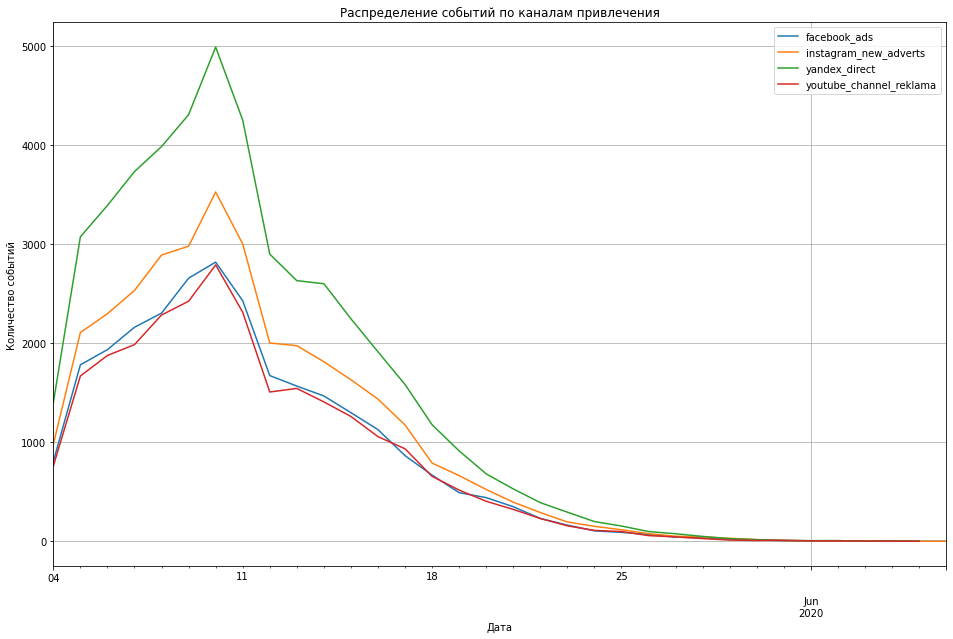

In [12]:
# создадим сводную таблицу по столбцу основного датафрейма df['event_datetime'], округлив время до 1 часа
# за столбцы возьмем данные о канала привлечения
# для каждого канала по времени посчитаем общее количество событий и выведем график на экран
channel_pivot = df.pivot_table(index=df['event_datetime'].dt.round('D'), columns='source', values='event', aggfunc='count')
channel_pivot.plot(figsize=(16, 10), grid=True)
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по каналам привлечения')
plt.show();

Из графика видно, что больше всего событий совершают пользователи пользователи из канала `yandex_direct`, на втором месте `instagram_new_adverts`. Далее примерно на равне идут каналы `facebook_ads` и `youtube_channel_reklama`.

Теперь рассмотри среднее количество событий, совершенное пользователями в день по каналам привлечения:

In [13]:
# создадим свначала сводную таблицу для каждого пользователя с указанием канала привлечения
# посчитаем количество действий пользователя в день, взятый из столбца event_datetime, значения котрого округлоим до дня
# перезапишем эту сводную таблицу, рассчитав среднее количество событий каждого пользователя по каналам привлечения
# и выведем ее на экран
mean_event_pivot = df.pivot_table(
    index=['user_id', 'source', df['event_datetime'].dt.round('D')], 
    values='event', aggfunc='count'
)
mean_event_pivot = mean_event_pivot.pivot_table(index=['source'], values='event', aggfunc='mean')
mean_event_pivot = mean_event_pivot.sort_values(by='event', ascending = False).reset_index()
mean_event_pivot

,source,event
0,facebook_ads,1.418422
1,youtube_channel_reklama,1.414866
2,instagram_new_adverts,1.414676
3,yandex_direct,1.413365


**Вывод**

**Больше всего активных пользователей привлек канал `yandex_direct`** - 4817, что составило 35,48% от общего количества.
На втором месте канал `instagram_new_adverts` с 3347 привлеченными пользователями, 24,65% от общего.

А вот среднее количество событий уникальных пользователей в день по каналам привлечения оказалось почти одинаковое, разница в тысячных долях. Соотвественно можно сказать, что **среднее количество событий не зависит от канала привлечения, и составляет 1,41**. Это логично, если учесть, что геймлпей одинаков для всех пользователей.

Также на графике виден период рекламной компании, начало 04.05 и окончание 10.05 включительно, далее привлечение новых пользователей останавливается и активность начинает снижаться.

### Количество игроков и среднее время и окончания 1го уровня по разным условиям

Рассчитаем и выведем информацию о среднем прохождении 1го уровня через реализацию проекта и победой над первым врагом для общего количества пользователей:

In [14]:
# выделим id nользователей, завершивших 1ый уровень через реализацию проекта
# посчитаем для каждого пользователя разницу между датой начала и датой окончания
users_project_all = df.query('event == "project"')['user_id']
project_stage_one_all = df.query(
    'user_id in @users_project_all').groupby('user_id')['event_datetime'].apply(lambda x: x.max() - x.min())

# выделим id nользователей, завершивших 1ый уровень через победу над врагом
# посчитаем для каждого пользователя разницу между датой начала и датой окончания

users_battle_all = df.query('event == "finished_stage_1" and user_id not in @users_project_all')['user_id']
battle_stage_one_all = df.query(
    'user_id in @users_battle_all').groupby(
    'user_id')['event_datetime'].apply(lambda x: x.max() - x.min())

print('Среднее время прохождения первого уровня составляет:')
print(f"- для всех пользователей через проект: {project_stage_one_all.mean()}{chr(10)}"
f"- для всех пользователей через победу: {battle_stage_one_all.mean()}")

Среднее время прохождения первого уровня составляет:
- для всех пользователей через проект: 13 days 11:00:49.135048231
- для всех пользователей через победу: 11 days 02:30:24.076183244


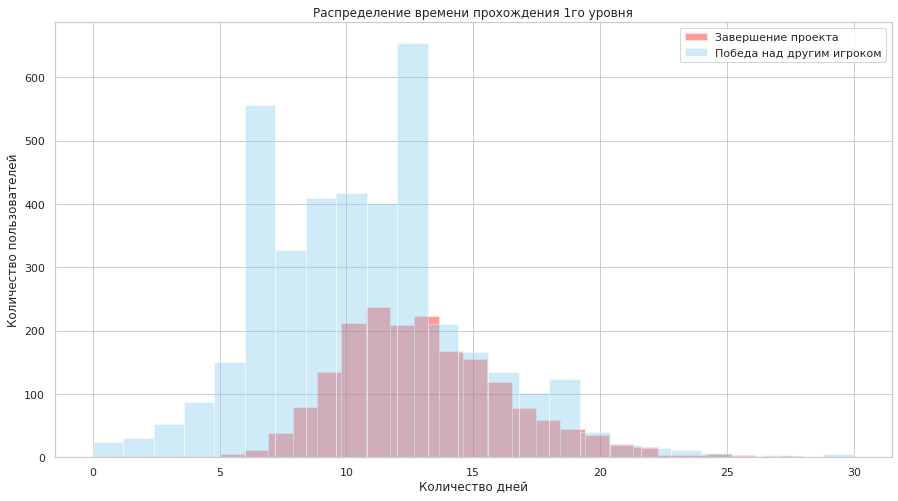

In [15]:
# на основе таблиц project_stage_one и battle_stage_one построим график распределения
# пользователей по видам завершения 1го уровня
# настроим сетку и размер графика, зададим параметры - время завершения, округлим до дней
# зададим цветовую палитру, подпишем график и оси
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
sns.distplot(project_stage_one_all.dt.days, bins=25, kde=False, color='red', label='Завершение проекта')
sns.distplot(battle_stage_one_all.dt.days, bins=25, kde=False, color='skyblue', label='Победа над другим игроком')
plt.legend()
plt.title('Распределение времени прохождения 1го уровня')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей');

Из графика видно, что большая часть игроков проходит 1ый уровень путем победы над врагом. Подкрепим данный вывод таблицей:

In [16]:
# создадим датафрейм, в которое добавим суммарное количество игроков, завершивишх 1ый уровень разными способами
# и рассчитаем их долю от общего количества пользователей, завершивших уровень
users_finished = pd.DataFrame(
    {'finish_by': ['battle_win', 'project_win'], 
     'users_sum': [battle_stage_one_all.count(), project_stage_one_all.count()]
    })
users_finished['users_rate'] = (users_finished['users_sum'] / users_finished['users_sum'].sum()).apply("{:.2%}".format)
users_finished

,finish_by,users_sum,users_rate
0,battle_win,3951,67.92%
1,project_win,1866,32.08%


Далее рассмотрим время прохождения первого уровня для пользователей, привлеченных по различным каналам:

In [17]:
# для цикла создадим список рекламных каналов привлечения
source_list = ['youtube_channel_reklama', 'facebook_ads', 'instagram_new_adverts','yandex_direct']

Среднее время прохождения первого уровня составляет:
- для канала youtube_channel_reklama через проект: 13 days 13:20:37.989445910
- для канала youtube_channel_reklama через победу: 11 days 02:32:47.853846153
- для канала facebook_ads через проект: 13 days 10:08:04.570332480
- для канала facebook_ads через победу: 11 days 01:15:10.897233201
- для канала instagram_new_adverts через проект: 13 days 12:47:25.834033613
- для канала instagram_new_adverts через победу: 11 days 02:34:45.703030303
- для канала yandex_direct через проект: 13 days 08:46:45.812903225
- для канала yandex_direct через победу: 11 days 03:06:11.998593530


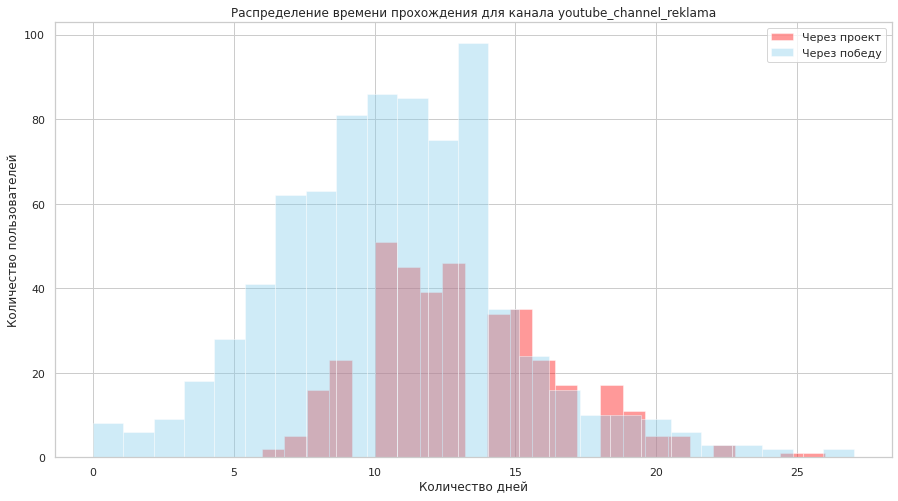

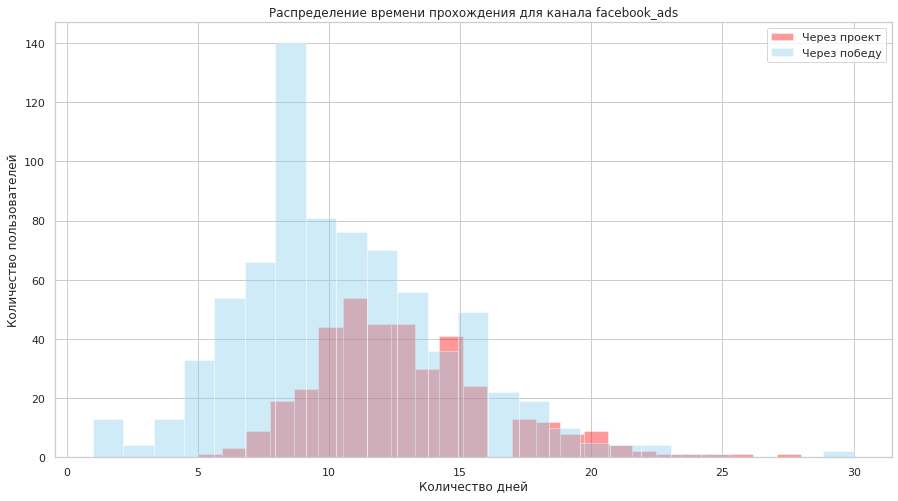

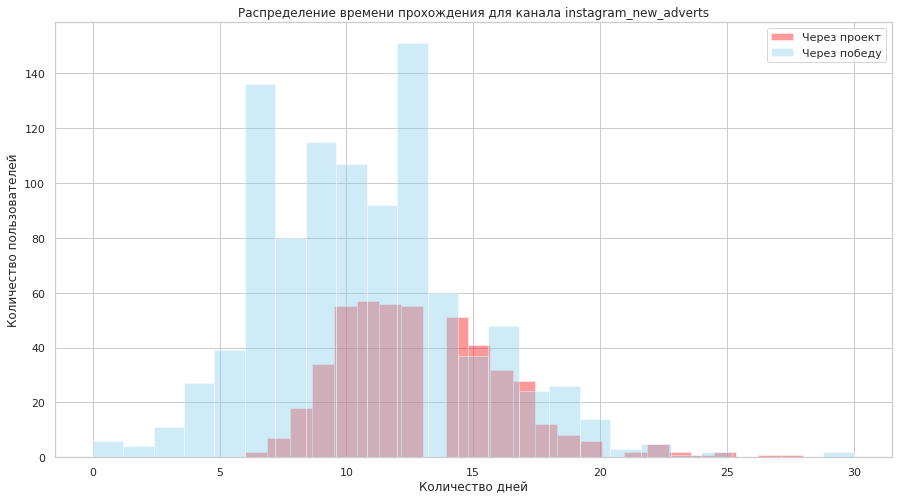

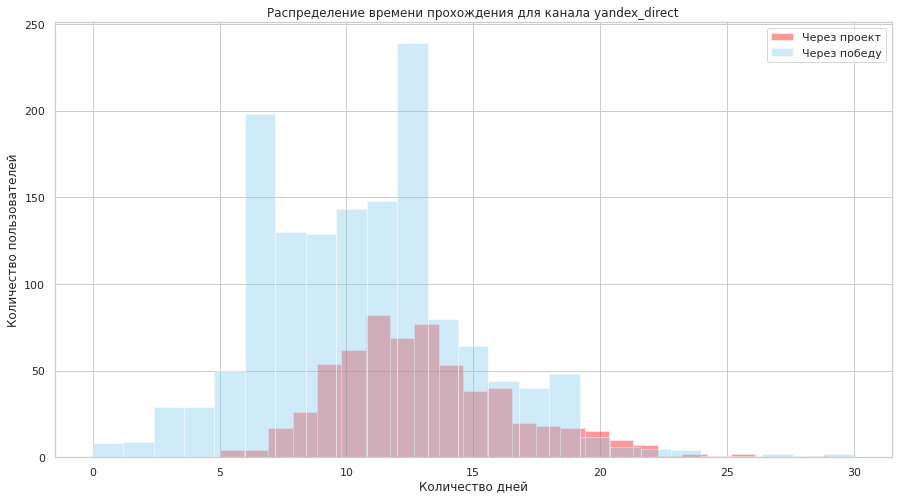

In [18]:
# создадим цикл, который проходит по списку source_list, подставляя значения каждого канала для итераций
print('Среднее время прохождения первого уровня составляет:')
for source in source_list:
    # выделим id nользователей, завершивших 1ый уровень через реализацию проекта
    # посчитаем для каждого пользователя разницу между датой начала и датой окончания
    users_project = df.query('source in @source').query('event == "project"')['user_id']
    project_stage_one = df.query(
        'user_id in @users_project').groupby('user_id')['event_datetime'].apply(lambda x: x.max() - x.min())
    # выделим id nользователей, завершивших 1ый уровень через победу над врагом
    # посчитаем для каждого пользователя разницу между датой начала и датой окончания
    users_battle = df.query('source in @source').query(
        'event == "finished_stage_1" and user_id not in @users_project')['user_id']
    battle_stage_one = df.query(
        'user_id in @users_battle').groupby('user_id')['event_datetime'].apply(lambda x: x.max() - x.min())
    print(f"- для канала {source} через проект: {project_stage_one.mean()}{chr(10)}"
          f"- для канала {source} через победу: {battle_stage_one.mean()}")
    # на основе таблиц project_stage_one и battle_stage_one построим график распределения
    # пользователей по видам завершения 1го уровня
    # настроим сетку и размер графика, зададим параметры - время завершения, округлим до дней
    # зададим цветовую палитру, подпишем график и оси
    sns.set(style="whitegrid")
    plt.figure(figsize=(15,8))
    sns.distplot(project_stage_one.dt.days, bins=25, kde=False, color='red', label='Через проект')
    sns.distplot(battle_stage_one.dt.days, bins=25, kde=False, color='skyblue', label='Через победу')
    plt.legend()
    plt.title(f"Распределение времени прохождения для канала {source}")
    plt.xlabel('Количество дней')
    plt.ylabel('Количество пользователей');

**Вывод**

Анализ показал, что среднее время прохождения первого уровня для всех пользователей по различным условиям составило:
* победа над первым врагом - 11 дней 2,5 часов
* реализация проекта - 13 дней 11 часов

Предварительно можно сказать, что время прохождения по разным условия отличается, но для точности необходим статистический тест.

**Если смотреть по каналам привлечения, разница во времени прохождения незначительная**.

График распределения имеет нормальное распределение и показал, что большая часть игроков предпочитают проходить уровень победой над врагом (3951 игроков, 68% от общего количества), а не реализацией проекта (1866 игроков, 32%). 
Также видно, что завершить 1ый уровень быстрее победой над врагом.

Соответственно, **победа над врагом более быстрый и действенный метод прохождения 1го уровня**, чем и пользуются большинство игроков.

### Количество посещений приложения в день

Создадим сводную таблицу общего количества пользователей для расчета посещений приложения в день, количества уникальных пользователей и среднего количества посещений уникальными пользователями. На основании этой таблицы построим график:

In [19]:
# создадим сводную таблицу, в которой по датам посещения расчитаем количество посещений и уникальных пользователей
# на основании этих данных рассчитаем среднее количество посещений в день на уникального пользователя
visits_pivot = df.pivot_table(index=df['event_datetime'].dt.normalize(), values='user_id', aggfunc=['count','nunique'])
visits_pivot.columns = ['visits_total', 'users_total']
visits_pivot['visits_per_user'] = (visits_pivot['visits_total'] / visits_pivot['users_total']).round(2)
visits_mean = visits_pivot['visits_total'].mean(axis=0).astype('int32')
users_mean = visits_pivot['users_total'].mean(axis=0).astype('int32')
visits_per_user_mean = visits_pivot['visits_per_user'].mean(axis=0).round(2)

# на экран выведем средние показатели посещений в день, количества уникальных пользователей
# и количество посещений уникальными пользователями.
print('Среднее количество в день:')
print(f"- Посещений для всех пользователей {visits_mean}{chr(10)}"
      f"- Уникальных пользователей для всех пользователей {users_mean}{chr(10)}"
      f"- Посещений приложения уникальным пользователем для всех пользователей {visits_per_user_mean}")

Среднее количество в день:
- Посещений для всех пользователей 4110
- Уникальных пользователей для всех пользователей 2884
- Посещений приложения уникальным пользователем для всех пользователей 1.33


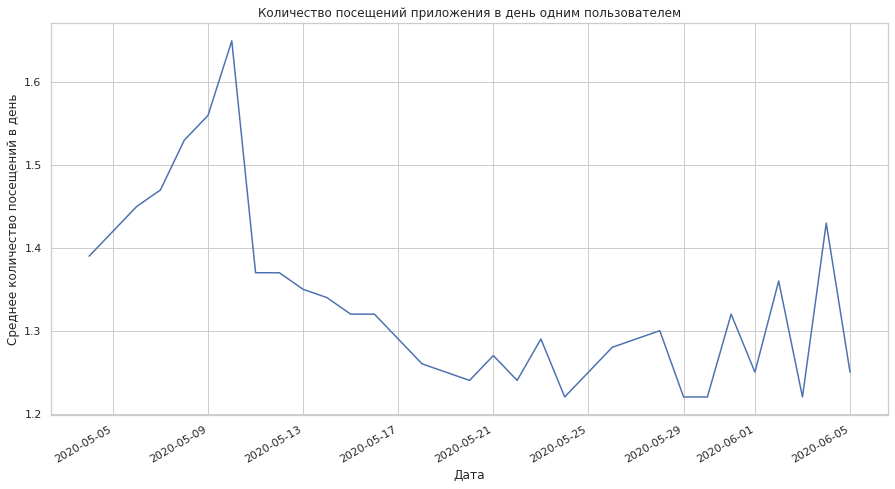

In [20]:
# на основе сводной таблицы visits_pivot построим линейный график
# настроим размер графика и подпишем оси
date = visits_pivot.index
value = visits_pivot['visits_per_user']
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(date, value)
fig.autofmt_xdate()
plt.title('Количество посещений приложения в день одним пользователем')
plt.xlabel('Дата')
plt.ylabel('Среднее количество посещений в день');

Среднее количество в день:
- Посещений для канала youtube_channel_reklama: 828
- Уникальных пользователей для канала youtube_channel_reklama: 581
- Посещений приложения уникальным пользователем для канала youtube_channel_reklama: 1.36
- Посещений для канала facebook_ads: 838
- Уникальных пользователей для канала facebook_ads: 585
- Посещений приложения уникальным пользователем для канала facebook_ads: 1.33
- Посещений для канала instagram_new_adverts: 1022
- Уникальных пользователей для канала instagram_new_adverts: 716
- Посещений приложения уникальным пользователем для канала instagram_new_adverts: 1.35
- Посещений для канала yandex_direct: 1445
- Уникальных пользователей для канала yandex_direct: 1018
- Посещений приложения уникальным пользователем для канала yandex_direct: 1.3


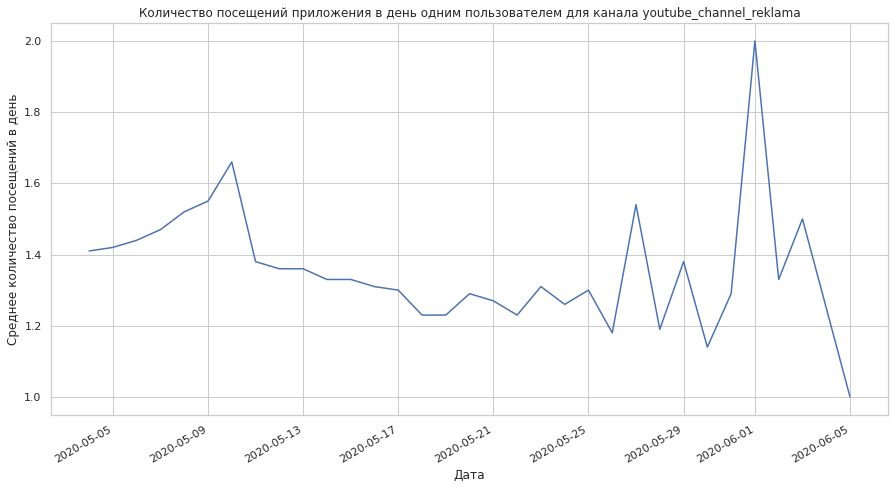

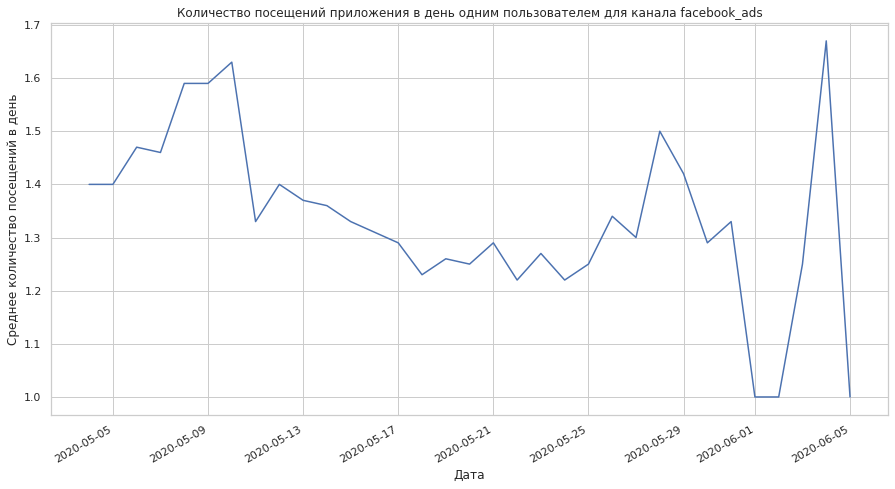

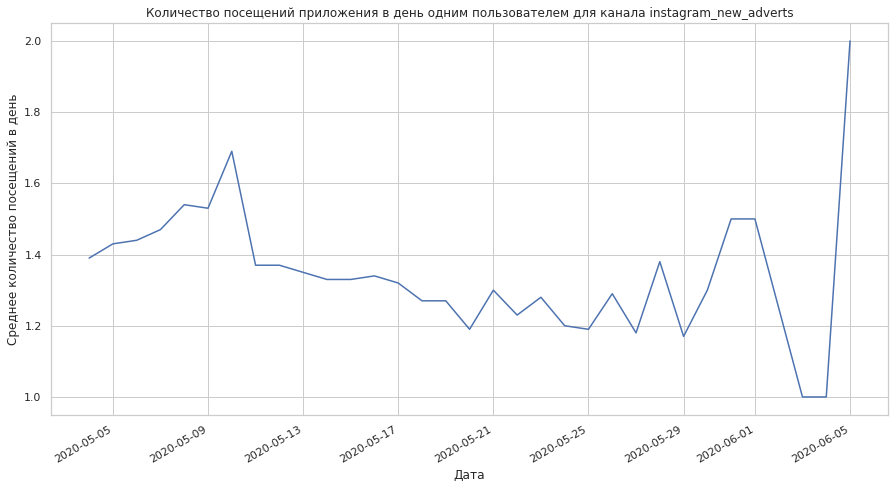

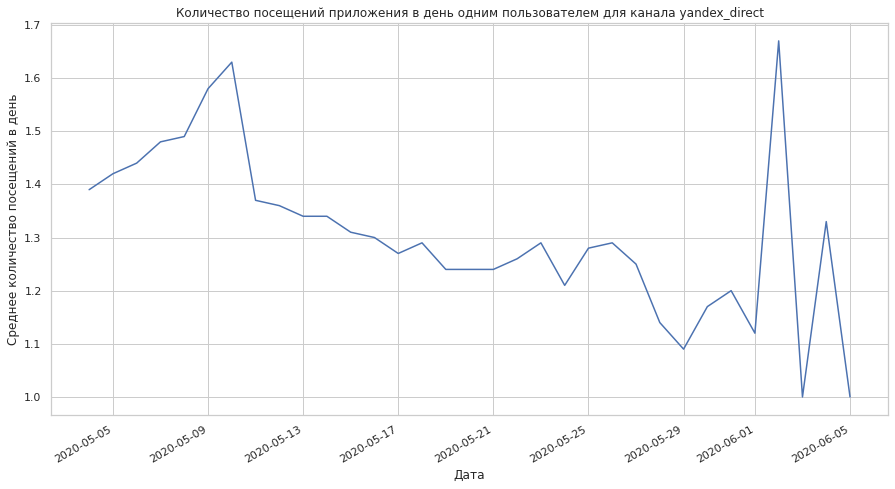

In [21]:
# создадим цикл, который проходит по списку source_list, подставляя значения каждого канала для итераций
print('Среднее количество в день:')
for source in source_list:
    # создадим сводную таблицу, в которой по датам посещения расчитаем количество посещений и уникальных пользователей
    # на основании этих данных рассчитаем среднее количество посещений в день на уникального пользователя
    visits_pivot = df.query('source in @source').pivot_table(
        index=df['event_datetime'].dt.normalize(), values='user_id', aggfunc=['count','nunique'])
    visits_pivot.columns = ['visits_total', 'users_total']
    visits_pivot['visits_per_user'] = (visits_pivot['visits_total'] / visits_pivot['users_total']).round(2)
    visits_mean = visits_pivot['visits_total'].mean(axis=0).astype('int32')
    users_mean = visits_pivot['users_total'].mean(axis=0).astype('int32')
    visits_per_user_mean = visits_pivot['visits_per_user'].mean(axis=0).round(2)
    # на экран выведем средние показатели посещений в день, количества уникальных пользователей
    # и количество посещений уникальными пользователями.
    print(f"- Посещений для канала {source}: {visits_mean}{chr(10)}"
          f"- Уникальных пользователей для канала {source}: {users_mean}{chr(10)}"
          f"- Посещений приложения уникальным пользователем для канала {source}: {visits_per_user_mean}")
    # на основе сводной таблицы visits_pivot построим линейный график
    # настроим размер графика и подпишем оси
    date = visits_pivot.index
    value = visits_pivot['visits_per_user']
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(date, value)
    fig.autofmt_xdate()
    plt.title(f"Количество посещений приложения в день одним пользователем для канала {source}")
    plt.xlabel('Дата')
    plt.ylabel('Среднее количество посещений в день');

**Вывод**

Как показал расчет и график для общего количества пользователей, в среднем 2884 уникальных пользователя посещают приложение 4110 раз в день, что составляет 1.33 посещения на одного.
График повторяет увиденный ранее пик рекламной компании - 10 мая. Далее, после окончания рекламной компании активность игроков начинает снижаться.

По каналам привлечения разница в посещениях уникальным пользователем в день минимальна и находится в рамках 1.3 - 1.36. СТоит отметить лидирующее положения канала `yandex_direct` по количеству уникальных пользователей. Но в среднем, чаще всего заходят в приложения игроки из `youtube_channel_reklama`: 1.36 раз в сутки.

### Стоимость привлечения новых клиентов CAC

Как выяснилось ранее, в датафрейме отсутсвуют "органические клиенты", поэтому исключать их не понадобиться.

Перед расчетом CAC изучим динамику расходов на привлечение клиентов. Для этого сделаем сводную таблицу и построим по ней график:

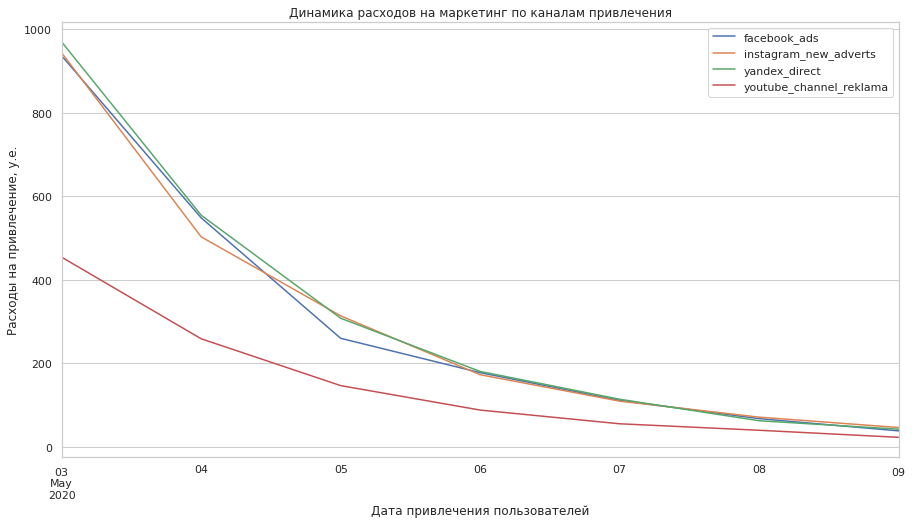

In [22]:
# изменим исходную таблицу df_ad, для удобства построения графика
# для этого создадим сводную таблицу с индексом дней оплаты рекламы и значениями расходов по каналам привлечения
ad_pivot = df_ad.pivot_table(index='day', columns='source', values='cost')

# на основании этой таблицы построим линейный график с динамикой расходов по каналам привлечения
ad_pivot.plot(figsize=(15, 8), grid=True)
plt.legend()
plt.xlabel('Дата привлечения пользователей')
plt.ylabel('Расходы на привлечение, у.е.')
plt.title('Динамика расходов на маркетинг по каналам привлечения')
plt.show()

In [23]:
# для расчета CAC посчитаем суммарные расходы по каналам за все дни
ad_pivot.loc['total_per_channel'] = ad_pivot.sum(axis=0)
ad_pivot = ad_pivot.T.reset_index()
# к таблице ad_pivot добавим данные из ранее созданной таблицы event_user_id
# где хранятся данные с количеством человек, привлеченных по каналам и сократим ее для удобства
cac_pivot = ad_pivot.merge(event_user_id, on='source')
cac_pivot = cac_pivot[['source', 'total_per_channel','users_sum']]
# рассчитаем CAC, разделив маркетинговые расходы на количество привлеченных пользователей
# и выведем полученную таблицу на экран
cac_pivot['cac'] = (cac_pivot['total_per_channel'] / cac_pivot['users_sum']).round(2)
cac_pivot

,source,total_per_channel,users_sum,cac
0,facebook_ads,2140.904643,2726,0.79
1,instagram_new_adverts,2161.441691,3347,0.65
2,yandex_direct,2233.111449,4817,0.46
3,youtube_channel_reklama,1068.119204,2686,0.40


**Вывод**

Затраты по каналам привлечения составили:
* `facebook_ads` - 2140.90 у.е.
* `instagram_new_adverts` - 2161.44 у.е.
* `yandex_direct` - 2233.11 у.е.
* `youtube_channel_reklama` - 1068.12 у.е.

Видно, что динамика расходов по каналам примерно одинаковая. А вот по уровню расходов `youtube_channel_reklama` находится ниже остальных.

Расчет стоимости привлечения клиентов по каналам показал следующее:
* `facebook_ads` - 0.79 у.е.
* `instagram_new_adverts` - 0.65 у.е.
* `yandex_direct` - 0.46 у.е.
* `youtube_channel_reklama` - 0.40 у.е.

Соответственно **самая высокая CAC для канала `facebook_ads`, самая низкая для `youtube_channel_reklama`.**

Самый перспективынй канал в данном случае - `yandex_direct`, неплохой CAC, больше всего привлеченных пользователей. Но это все конечно, скорее всего, за счет того, что в него вложили больше всего средств.

### Возможные способы монетизации

В связи с тем, что планируемая моентизация - показ рекламы на экране с выбором типа объекта для постройки, необходимо рассчитать среднее количество построек, которые совершает пользователь за прохождение первого уровня:

In [24]:
# создадим новые переменные, сгруппируем основной датафрейм df по следующим условиям:
# - игрок построил любое здание
# - игрок построил любое здание и завершил уровень через проект
# - игрок построил любое здание и завершил уровень через победу
# рассчитаем по этим данным количество построек и рассчитаем среднее значение для всех групп пользователей
mean_build_total = (df.query('event == "building"')
                    .groupby('user_id').agg({'event': 'count'}).mean())
mean_build_project = (df.query('event == "building" and user_id in @users_project_all')
                      .groupby('user_id').agg({'event': 'count'}).mean())
mean_build_battle = (df.query('event == "building" and user_id in @users_battle_all')
                     .groupby('user_id').agg({'event': 'count'}).mean())

# выведем на экран полученные значения
print(f"Среднее количество построек за прохождение первого уровня:{chr(10)}"
      f"- для всех пользователей {'{:.2f}'.format(float(mean_build_total))}{chr(10)}"
      f"- для пользователей через проект {'{:.2f}'.format(float(mean_build_project))}{chr(10)}"
      f"- для пользователей через победу {'{:.2f}'.format(float(mean_build_battle))}")    

Среднее количество построек за прохождение первого уровня:
- для всех пользователей 9.43
- для пользователей через проект 12.65
- для пользователей через победу 9.41


In [25]:
# в ранее созданную таблицу cac_pivot добавим расчет выручки от просмотра рекламы для трех групп пользователей
# для того, чтобы покрыть затраты на маркетинг
# добавим строку с расчетом среднего
# и выведем полученный результат на экран
cac_pivot['revenue_all'] = (cac_pivot['cac'] / 9.43).round(2)
cac_pivot['revenue_project'] = (cac_pivot['cac'] / 12.65).round(2)
cac_pivot['revenue_battle'] = (cac_pivot['cac'] / 9.41).round(2)
cac_pivot.loc['mean'] = cac_pivot.mean(axis=0)
cac_pivot

,source,total_per_channel,users_sum,cac,revenue_all,revenue_project,revenue_battle
0,facebook_ads,2140.904643,2726.0,0.790,0.08,0.060,0.08
1,instagram_new_adverts,2161.441691,3347.0,0.650,0.07,0.050,0.07
2,yandex_direct,2233.111449,4817.0,0.460,0.05,0.040,0.05
3,youtube_channel_reklama,1068.119204,2686.0,0.400,0.04,0.030,0.04
mean,NaN,1900.894247,3394.0,0.575,0.06,0.045,0.06


**Вывод**

Среднее количество зданий, который строят пользователи за прохождение первого уровня:
* для всех пользователей 9.43
* для пользователей через проект 12.65
* для пользователей через победу 9.41

Следует отметить, что игроки с боевой стратегией строят меньше зданий. В будущем, соответственно, будут смотреть меньше рекламы и приносить доход.

При этом средняя CAC на одного пользователя получилась 0.575. Исходя из этого, **монетизация за один показ рекламы должна составлять не менее 0.06 у.е.**, чтобы покрыть расходы на маркетинг.

### Вывод

Получили основные инсайты в ходе исследовательского анализа данных:

**Среднее количество событий**

* Больше всего активных пользователей привлек канал `yandex_direct`, на втором месте канал `instagram_new_adverts`;
* Среднее количество событий не зависит от канала привлечения, и составляет 1,41;
* Период рекламной компании, начало 04.05 и окончание 10.05 включительно

**Количество игроков и среднее время и окончания 1го уровня по разным условиям**

* Среднее время прохождения первого уровня: победа над первым врагом - 11 дней 2,5 часов, реализация проекта - 13 дней 11 часов;
* По каналам привлечения, разница во времени прохождения незначительная;
* Количество игроков, прошедших первый уровен: победой над врагом 3951, 68% от общего количества, реализацией проекта 1866, 32%;
* Завершить первый уровень быстрее победой над врагом.

**Количество посещений приложения в день**

* В среднем 2884 уникальных пользователя посещают приложение 4110 раз в день, что составляет 1.33 посещения на одного;
* По каналам привлечения разница в посещениях уникальным пользователем в день минимальна и находится в рамках 1.3 - 1.36;
* По количеству уникальных пользователей Лидирует канал `yandex_direct`;
* Чаще всего заходят в приложение  игроки из `youtube_channel_reklama`: 1.36 раз в сутки.

**Стоимост привлечения новых клиентов CAC**

* Динамика расходов по каналам примерно одинаковая;
* По уровню расходов `youtube_channel_reklama` находится ниже остальных;
* Самая высокая CAC для канала `facebook_ads`: 0.79 у.е;
* Самая низкая CAC для `youtube_channel_reklama`: 0.40 у.е.

**Возможные способы монетизации**

Среднее количество зданий, который строят пользователи за прохождение первого уровня:
* для всех пользователей 9.43
* для пользователей через проект 12.65
* для пользователей через победу 9.41

* Средняя CAC на одного пользователя 0.575;
* Монетизация за один показ рекламы должна составлять не менее 0.06 у.е., чтобы покрыть расходы на маркетинг.

## Статистический анализ

### Время завершения уровня различается в зависимости способа прохождения

Для проверки этой гипотезы сформируем нулевую и альтернативную гипотезы:
* `H0` - статистически значимой разницы времени прохождения уровня по разным условиям нет
* `H1` - разница времени прохождения уровня по разным условиям статистически значима

Воспользуемся тестом Манна-Уитни. Установим уровень статистической значимости **alpha = 0,05**

In [26]:
# применим тест Манна-Уитни с уровнем статистической значимости 0.05
# воспользуемся данными со временем прохождения первого уровня для разных условий прохождения
results = stats.mannwhitneyu(
    project_stage_one_all.reset_index()['event_datetime'],
    battle_stage_one_all.reset_index()['event_datetime'])
alpha = 0.05
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Разница времени прохождения уровня по разным условиям статистически значима')
else:
    print('Статистически значимой разницы времени прохождения уровня по разным условиям нет')

p-значение:  1.1228044721644527e-106
Разница времени прохождения уровня по разным условиям статистически значима


### Количество построек различается в зависимости способа прохождения

Для проверки этой гипотезы сформируем нулевую и альтернативную гипотезы:
* `H0` - статистически значимой разницы в количестве построек по разным условиям прохождения уровня нет
* `H1` - разница в количестве построек по разным условиям прохождения уровня статистически значима

Воспользуемся тестом Манна-Уитни. Установим уровень статистической значимости **alpha = 0,05**

In [32]:
# перед тестом соберем уникальных пользователей и количество зданий, построенных в ходе прохождения первого уровня
# создав две переменные по условиям прохождения - через проект и через победу
project_building = df.query('user_id in @users_project_all').groupby('user_id').agg({'building_type':'count'}).reset_index()
battle_building = df.query('user_id in @users_battle_all').groupby('user_id').agg({'building_type':'count'}).reset_index()

In [33]:
# применим тест Манна-Уитни с уровнем статистической значимости 0.05
# воспользуемся данными с количеством построек пользователей для разных условий прохождения
results = stats.mannwhitneyu(
    project_building['building_type'],
   battle_building['building_type'])
alpha = 0.05
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Разница в количестве построек по разным условиям прохождения уровня статистически значима')
else:
    print('Статистически значимой разницы в количестве построек по разным условиям прохождения уровня нет')

p-значение:  5.211926275022306e-305
Разница в количестве построек по разным условиям прохождения уровня статистически значима


### Вывод

Проведя два теста, получили следующие результаты:
* **Разница времени прохождения уровня по разным условиям статистически значима**. Данный результат подтверждает предварительный вывод, выдвинутый ранее о различном времени прохождения уровня по разным условиям;
* **Разница в количестве построек по разным условиям прохождения уровня статистически значима**

## Общий вывод

Провели исследование данных о событиях, совершенных в мобильной игре «Космические братья». 

Выполнили предобработку и исследовательский анализ данных, ответили на основные вопросы проекта и сделали вывод по основной задаче будущей монетизации проекта:
* Больше всего активных пользователей привлек канал `yandex_direct`, на втором месте канал `instagram_new_adverts`;
* Среднее количество событий не зависит от канала привлечения;
* Среднее время прохождения первого уровня: победа над первым врагом - 11 дней 2,5 часов, реализация проекта - 13 дней 11 часов;
* По каналам привлечения, разница во времени прохождения незначительная;
* Количество игроков, прошедших первый уровен: победой над врагом 3951, 68% от общего количества, реализацией проекта 1866, 32%;
* В среднем 2884 уникальных пользователя посещают приложение 4110 раз в день, что составляет 1.33 посещения на одного;
* По каналам привлечения разница в посещениях уникальным пользователем в день минимальна;
* По количеству уникальных пользователей лидирует канал `yandex_direct`;
* Динамика расходов по каналам примерно одинаковая;
* Самая высокая CAC для канала `facebook_ads`: 0.79 у.е;
* Самая низкая CAC для `youtube_channel_reklama`: 0.40 у.е.
* Средняя CAC на одного пользователя 0.575 у.е.;
* Монетизация за один показ рекламы должна составлять не менее 0.06 у.е., чтобы покрыть расходы на маркетинг.

Статистический анализ данных показал следующее:
* Разница времени прохождения уровня по разным условиям статистически значима;
* Разница в количестве построек по разным условиям прохождения уровня статистически значима

Рекомендации:
* как уже было сказано, рассчитывать монетизацию одного показа рекламы в размере 0.06 у.е.;
* пересмотреть затраты на маркетинг каналов `facebook_ads` (имеет самую высокую CAC) и `youtube_channel_reklama` т.к. они привлекли меньше всего клиентов;
* увеличить затраты на маркетинг канала `yandex_direct`, т.к. он привлек больше всего активных и уникальных пользователей;
* модель монетизации оставить запланированную - показ рекламы на экране с выбором типа объекта для постройки. Учитывая средние количество построек (от 9 до 12) и дней (от 11 до 13) до завершения уровня, можно сказать, что пользователь будет видеть рекламу примерно 1 раз в день.
* в связи с тем, что пользователи чаще выбирают боевую стратегию и меньше строят зданий за прохождение уровня, необходимо или пересмотреть модель геймплей в плане боев, либо вводить рекламу и перед началом боя.